In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r"C:\Users\ASUS\Desktop\\loan dataset\TELCO CUSTOMER CHURN\WA_Fn-UseC_-Telco-Customer-Churn.csv",
names = ['CustomerID','Gender','SeniorCitizen','Partner','Dependents','Tenure','PhoneService','MultipleLines',
                        'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn'],header =0)
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)  
## there are empty strings or whitespace in the 'totalcharges' column,
#so replaced with NaN before converting to float.


df['TotalCharges'] = df['TotalCharges'].astype(float)

In [5]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

In [10]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [12]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [13]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [14]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [15]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [16]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [17]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [18]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [19]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [20]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [21]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [22]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [23]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [24]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [25]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

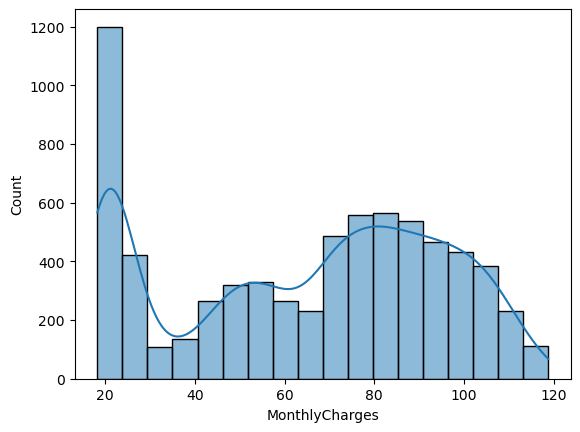

In [26]:
sns.histplot(x = df["MonthlyCharges"],kde =True)

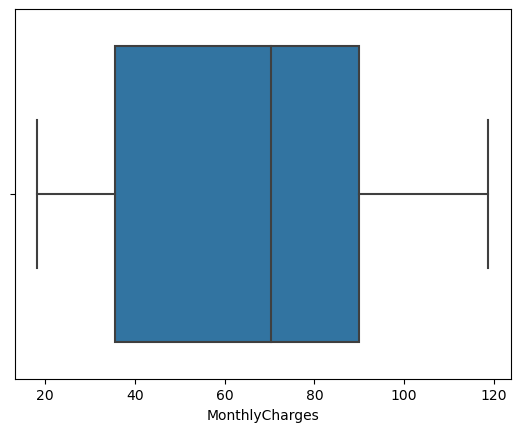

<Figure size 500x500 with 0 Axes>

In [27]:
sns.boxplot(x=df.MonthlyCharges)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='TotalCharges', ylabel='Count'>

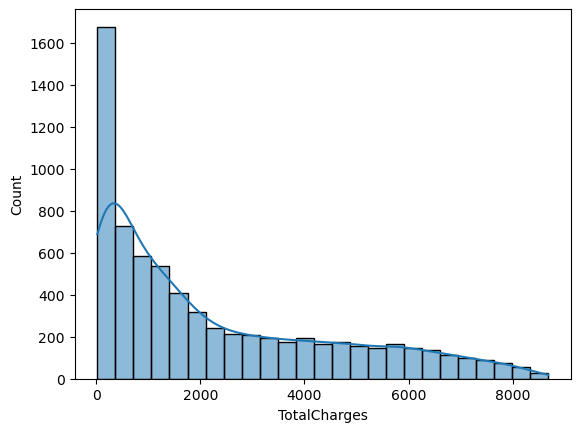

In [28]:
sns.histplot(x = df["TotalCharges"],kde =True)

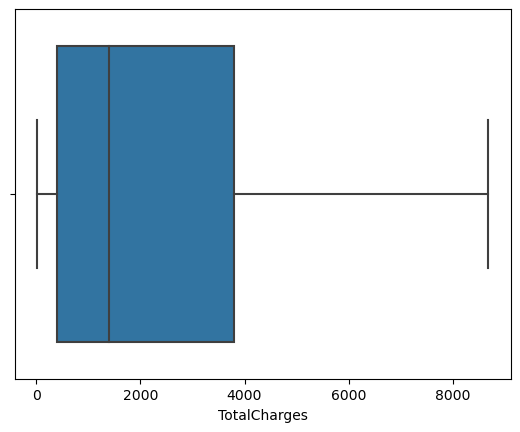

<Figure size 500x500 with 0 Axes>

In [29]:
sns.boxplot(x=df.TotalCharges)
plt.figure(figsize = [5,5])
plt.show()

<Axes: xlabel='Tenure', ylabel='Count'>

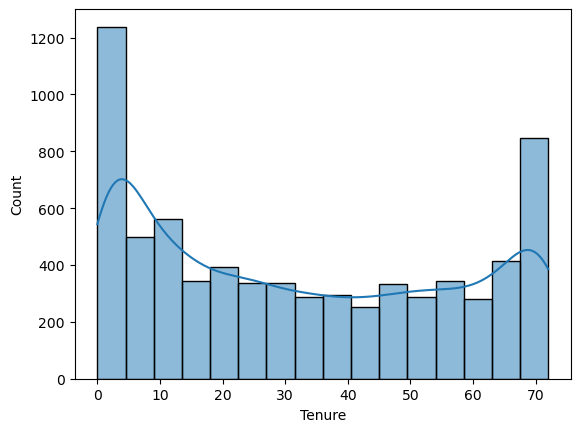

In [30]:
sns.histplot(x = df["Tenure"],kde =True)

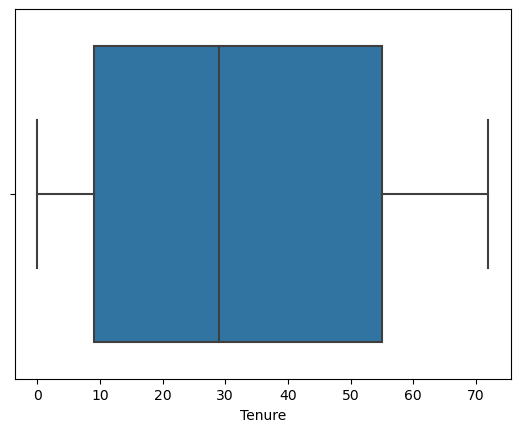

<Figure size 500x500 with 0 Axes>

In [31]:
sns.boxplot(x=df.Tenure)
plt.figure(figsize = [5,5])
plt.show()

In [32]:
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for column in columns_to_replace:
    df[column] = df[column].replace('No internet service', 'No')

In [33]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [34]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [35]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

In [36]:
df['InternetService'] = df['InternetService'].replace(['Fiber optic','DSL'], 'Yes')

In [37]:
df['InternetService'].value_counts()

Yes    5517
No     1526
Name: InternetService, dtype: int64

In [38]:
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [40]:
round((df['TotalCharges'].isna().sum()/len(df["TotalCharges"]))*100,3)

0.156

In [41]:
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True) ## missing values of total charges are replaced with monthly charges corresponding to it.


In [42]:
df['TotalCharges'].describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

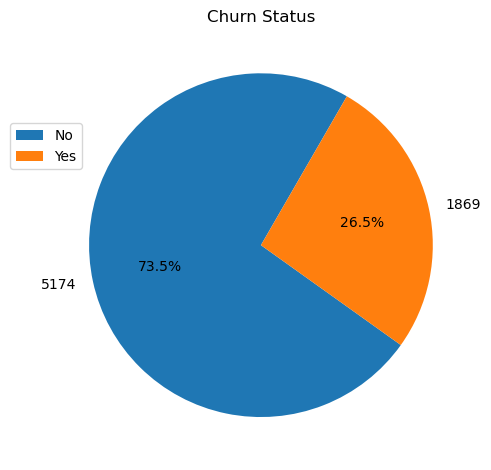

In [43]:
labels = df['Churn'].dropna().unique()
actual_values = df['Churn'].value_counts(dropna=True)
plt.pie(df['Churn'].value_counts(),labels= actual_values,autopct='%1.1f%%',startangle=60)

#labeling
plt.title('Churn Status', fontsize=12)
plt.legend(labels, bbox_to_anchor = (0.1, 0.8))
plt.tight_layout()
plt.show()


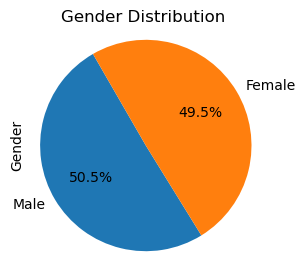

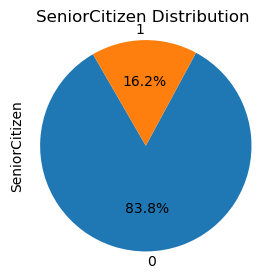

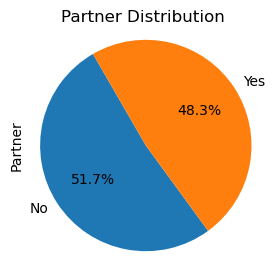

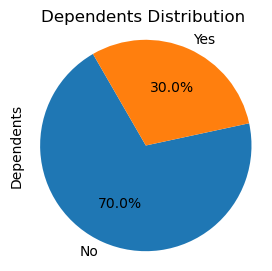

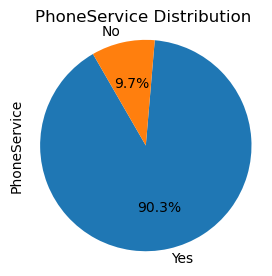

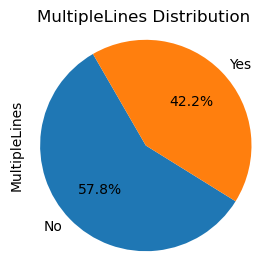

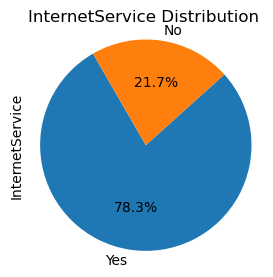

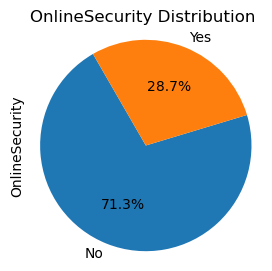

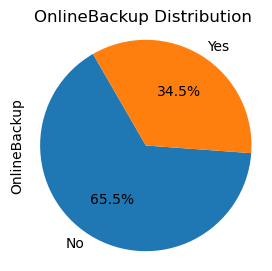

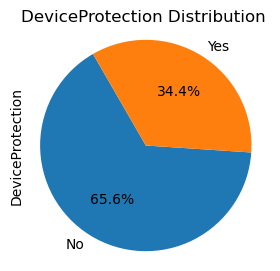

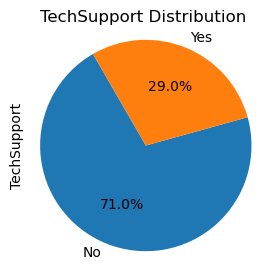

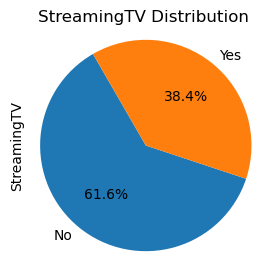

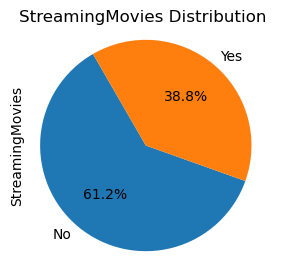

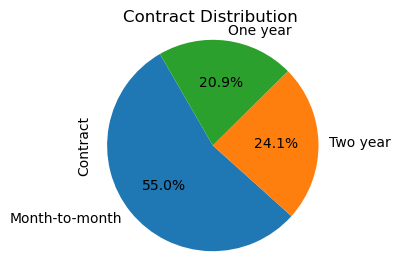

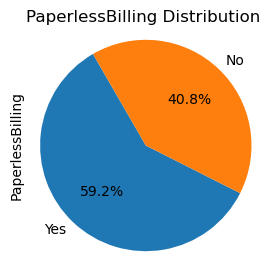

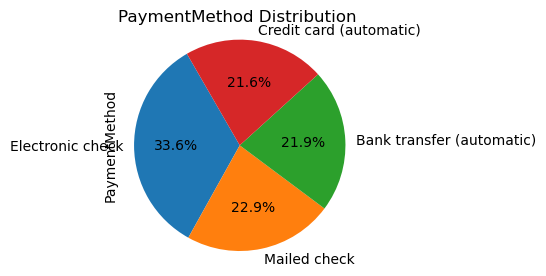

In [44]:
columns_for_pie_chart = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
                         'PhoneService', 'MultipleLines', 'InternetService',
                         'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies',
                         'Contract', 'PaperlessBilling', 'PaymentMethod']

# Loop through each column and create a pie chart
for column in columns_for_pie_chart:
    plt.figure(figsize=(3, 3))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=120)
    plt.title(column + ' Distribution ')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

<Axes: xlabel='Tenure', ylabel='TotalCharges'>

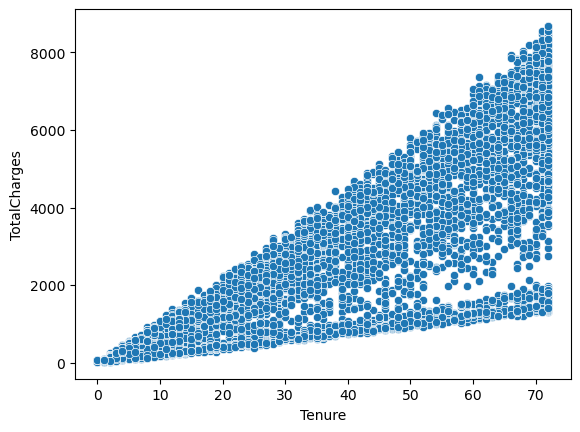

In [45]:
sns.scatterplot(df,x='Tenure',y ='TotalCharges')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 500x500 with 0 Axes>

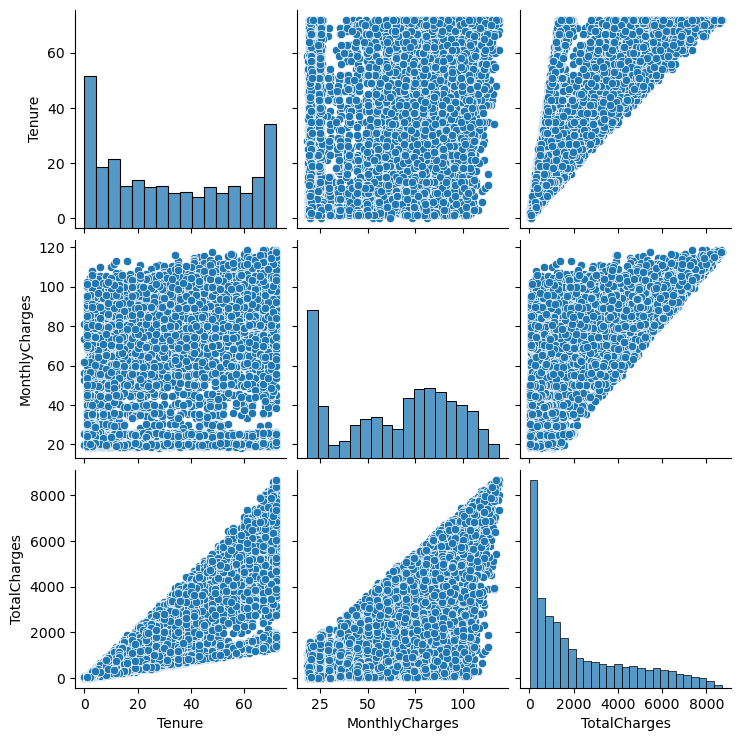

In [46]:
plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.show
#plt.savefig("D:\\")

In [47]:
cor = (df[["Tenure","MonthlyCharges","TotalCharges"]]).corr()
cor

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247900,0.826164
MonthlyCharges,0.247900,1.000000,0.651182
TotalCharges,0.826164,0.651182,1.000000


<Axes: >

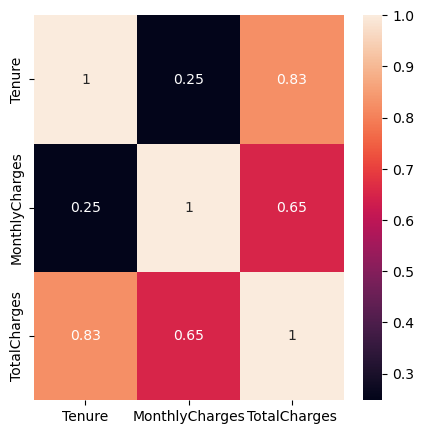

In [48]:
plt.figure(figsize= (5,5))
sns.heatmap(cor,annot =True)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

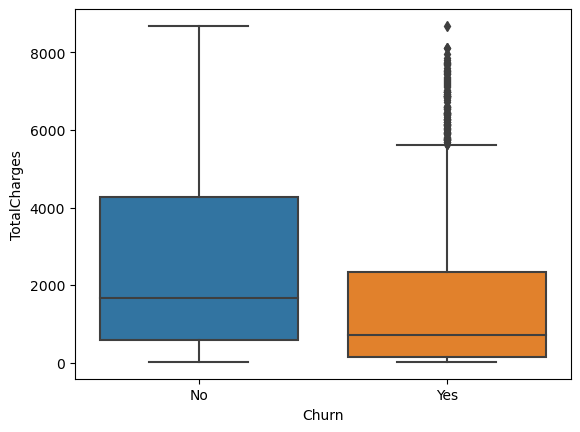

In [49]:
sns.boxplot(df,y="TotalCharges",x="Churn")

In [50]:
df.groupby('Churn')['TotalCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,2549.999497,2329.858843,18.80,572.9,1679.525,4262.85,8672.45
Yes,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


<Axes: xlabel='Churn', ylabel='Tenure'>

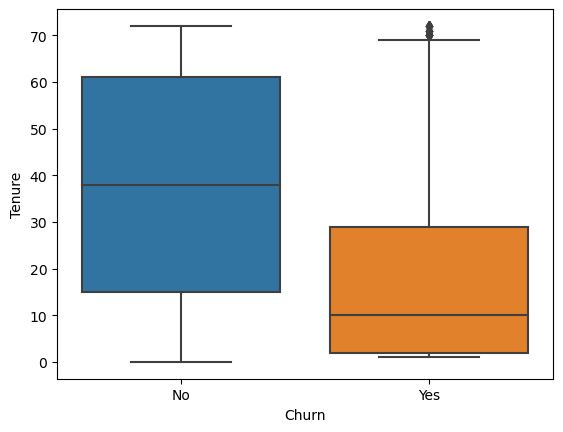

In [51]:
sns.boxplot(df,y="Tenure",x="Churn")

In [52]:
df['Churn_Flag'] = df['Churn'].map({'Yes': 1, 'No': 0})
#df['Churn_Flag']=df['Churn'].replace({'no':0,'yes':1})
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Flag
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,Yes,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


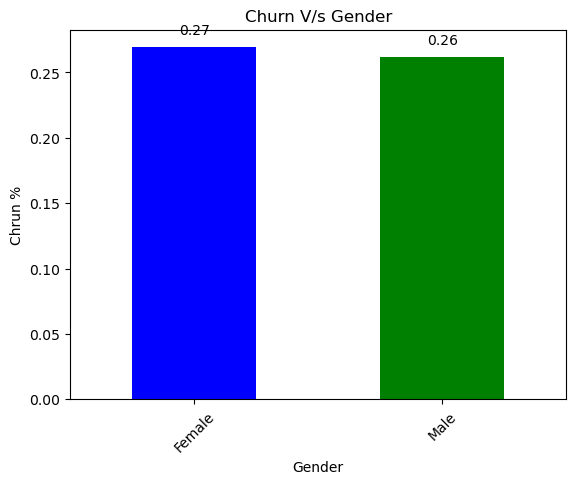

In [53]:

Gender_churn = df.groupby('Gender')['Churn_Flag'].mean().sort_values(ascending=False)

Gender_churn.plot.bar(color=['blue', 'green'])


plt.title('Churn V/s Gender')
plt.ylabel('Chrun %')
for i, v in enumerate(Gender_churn):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

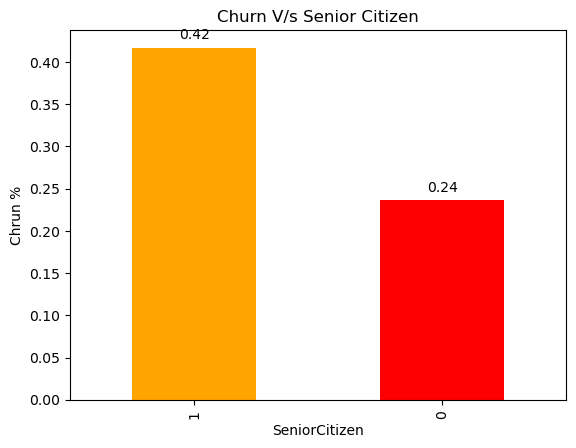

In [54]:
Seniorcitizen_churn = df.groupby('SeniorCitizen')['Churn_Flag'].mean().sort_values(ascending=False)

Seniorcitizen_churn.plot.bar(color=['orange', 'red'])


plt.title('Churn V/s Senior Citizen')
plt.ylabel('Chrun %')
for i, v in enumerate(Seniorcitizen_churn):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=90)
plt.show()

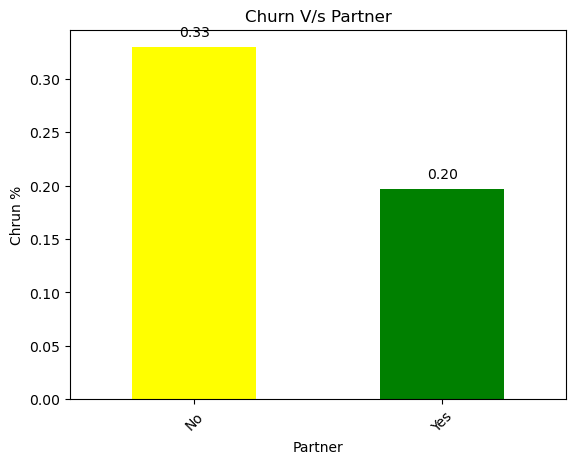

In [55]:
partner_churn = df.groupby('Partner')['Churn_Flag'].mean().sort_values(ascending=False)

partner_churn.plot.bar(color=['yellow', 'green'])

plt.title('Churn V/s Partner')
plt.ylabel('Chrun %')
for i, v in enumerate(partner_churn):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

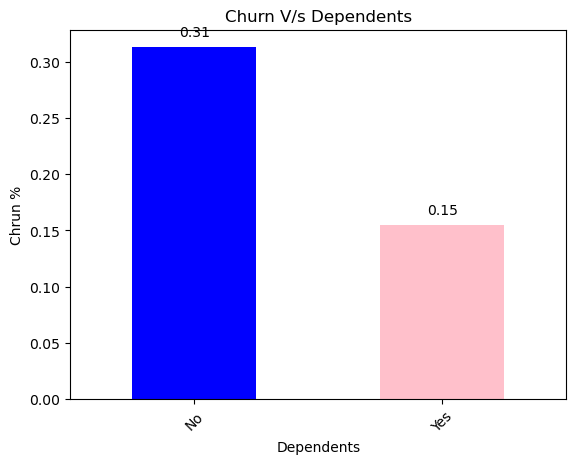

In [56]:
dep_churn = df.groupby('Dependents')['Churn_Flag'].mean().sort_values(ascending=False)

dep_churn.plot.bar(color=['blue', 'Pink'])

plt.title('Churn V/s Dependents')
plt.ylabel('Chrun %')
for i, v in enumerate(dep_churn):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

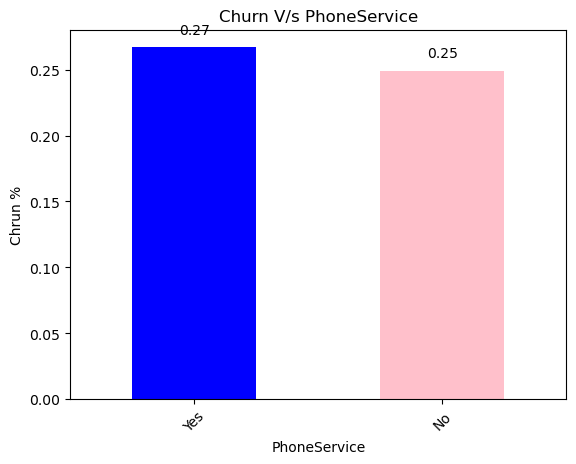

In [57]:
ph_churn = df.groupby('PhoneService')['Churn_Flag'].mean().sort_values(ascending=False)

ph_churn.plot.bar(color=['blue', 'Pink'])

plt.title('Churn V/s PhoneService')
plt.ylabel('Chrun %')
for i, v in enumerate(ph_churn):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

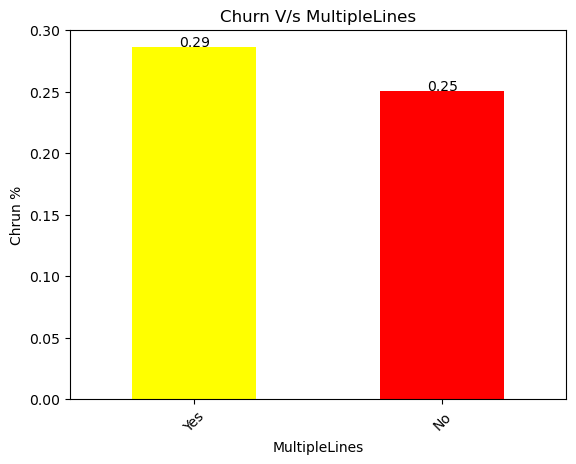

In [58]:
ml_churn = df.groupby('MultipleLines')['Churn_Flag'].mean().sort_values(ascending=False)

ml_churn.plot.bar(color=['yellow', 'red'])

plt.title('Churn V/s MultipleLines')
plt.ylabel('Chrun %')
for i, v in enumerate(ml_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

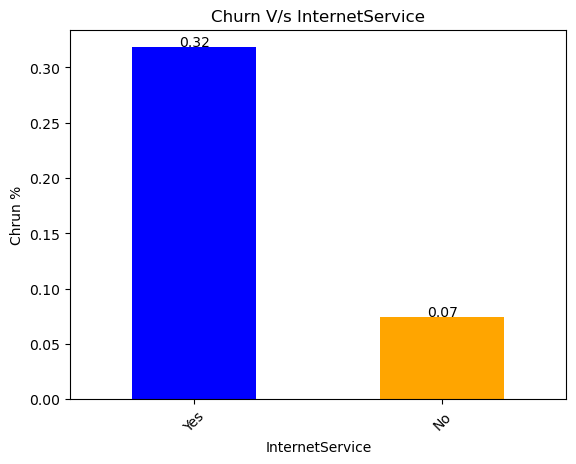

In [59]:
is_churn = df.groupby('InternetService')['Churn_Flag'].mean().sort_values(ascending=False)

is_churn.plot.bar(color=['blue', 'orange'])

plt.title('Churn V/s InternetService')
plt.ylabel('Chrun %')
for i, v in enumerate(is_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

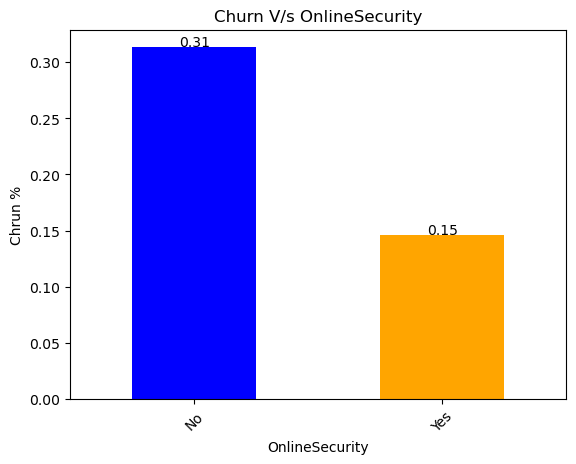

In [60]:
os_churn = df.groupby('OnlineSecurity')['Churn_Flag'].mean().sort_values(ascending=False)

os_churn.plot.bar(color=['blue', 'orange'])

plt.title('Churn V/s OnlineSecurity')
plt.ylabel('Chrun %')
for i, v in enumerate(os_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

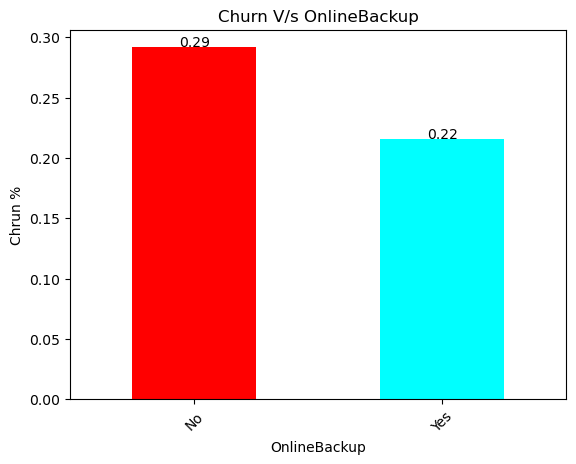

In [61]:
ob_churn = df.groupby('OnlineBackup')['Churn_Flag'].mean().sort_values(ascending=False)

ob_churn.plot.bar(color=['Red', 'cyan'])

plt.title('Churn V/s OnlineBackup')
plt.ylabel('Chrun %')
for i, v in enumerate(ob_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

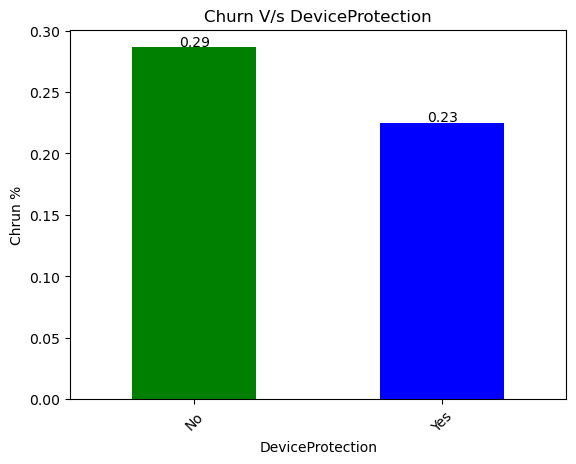

In [62]:
dp_churn = df.groupby('DeviceProtection')['Churn_Flag'].mean().sort_values(ascending=False)

dp_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s DeviceProtection')
plt.ylabel('Chrun %')
for i, v in enumerate(dp_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

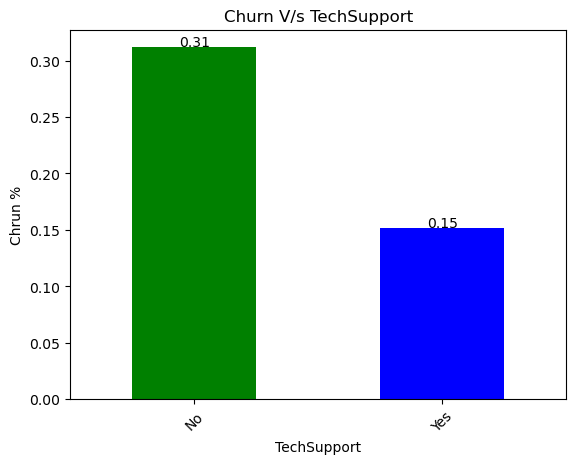

In [63]:
ts_churn = df.groupby('TechSupport')['Churn_Flag'].mean().sort_values(ascending=False)

ts_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s TechSupport')
plt.ylabel('Chrun %')
for i, v in enumerate(ts_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

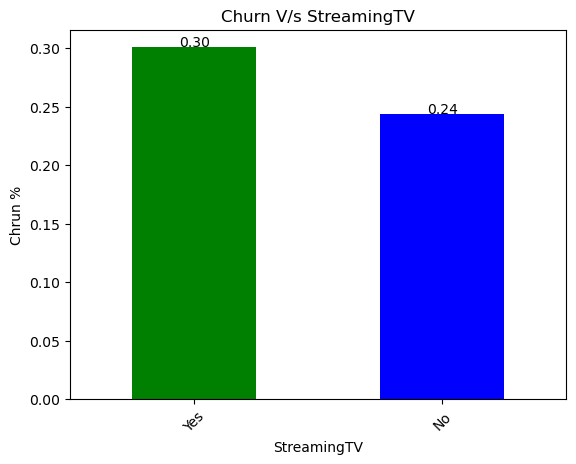

In [64]:
st_churn = df.groupby('StreamingTV')['Churn_Flag'].mean().sort_values(ascending=False)

st_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s StreamingTV')
plt.ylabel('Chrun %')
for i, v in enumerate(st_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

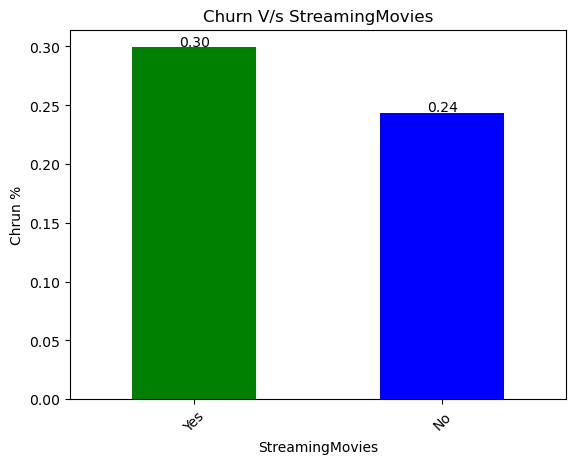

In [65]:
sm_churn = df.groupby('StreamingMovies')['Churn_Flag'].mean().sort_values(ascending=False)

sm_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s StreamingMovies')
plt.ylabel('Chrun %')
for i, v in enumerate(sm_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

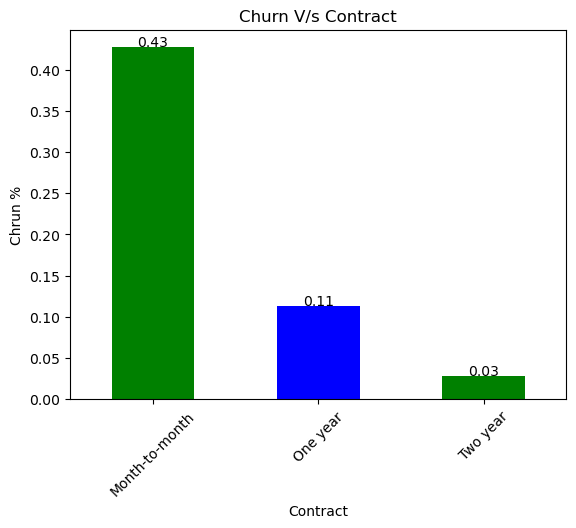

In [66]:
con_churn = df.groupby('Contract')['Churn_Flag'].mean().sort_values(ascending=False)

con_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s Contract')
plt.ylabel('Chrun %')
for i, v in enumerate(con_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

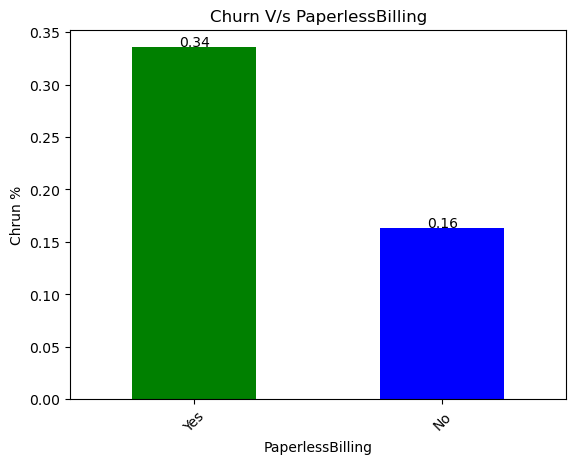

In [67]:
pb_churn = df.groupby('PaperlessBilling')['Churn_Flag'].mean().sort_values(ascending=False)

pb_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s PaperlessBilling')
plt.ylabel('Chrun %')
for i, v in enumerate(pb_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=45)
plt.show()

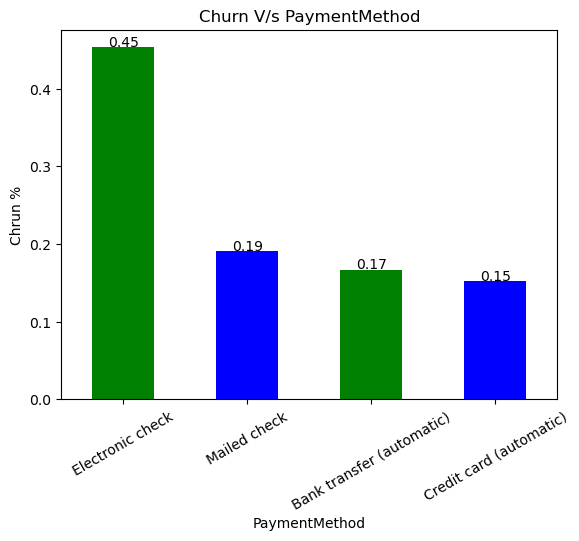

In [68]:
pm_churn = df.groupby('PaymentMethod')['Churn_Flag'].mean().sort_values(ascending=False)

pm_churn.plot.bar(color=['green', 'blue'])

plt.title('Churn V/s PaymentMethod')
plt.ylabel('Chrun %')
for i, v in enumerate(pm_churn):
    plt.text(i, v + 0.001, f'{v:.2f}', ha='center')

plt.xticks(rotation=30)
plt.show()

In [69]:
df.columns

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_Flag'],
      dtype='object')

<Axes: xlabel='SeniorCitizen', ylabel='Gender'>

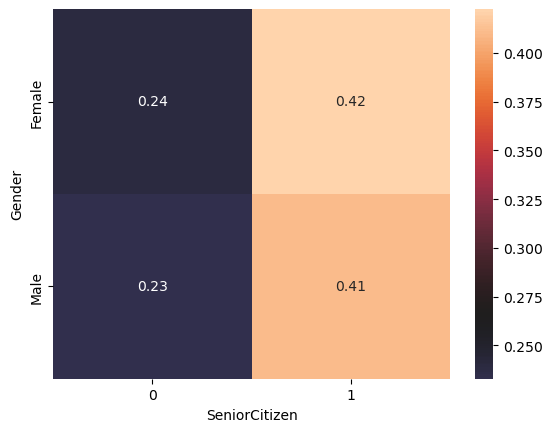

In [70]:
PT_gender=pd.pivot_table(data=df,index='Gender',columns='SeniorCitizen',values='Churn_Flag')
PT_gender
sns.heatmap(PT_gender,annot=True,center=df['Churn_Flag'].mean())

<Axes: xlabel='Contract', ylabel='InternetService'>

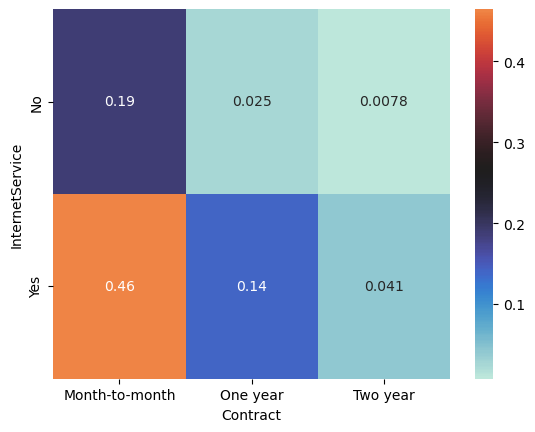

In [71]:
internet_contract_churn = df.pivot_table(index='InternetService', columns='Contract', values='Churn_Flag', aggfunc='mean')
sns.heatmap(internet_contract_churn,annot=True,center=df['Churn_Flag'].mean())

<Axes: xlabel='PaperlessBilling', ylabel='PaymentMethod'>

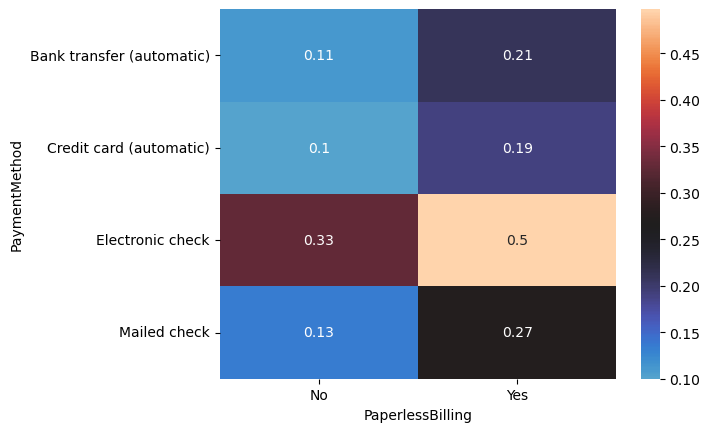

In [72]:
payment_paperless_churn = df.pivot_table(index='PaymentMethod', columns='PaperlessBilling', values='Churn_Flag', aggfunc='mean')

sns.heatmap(payment_paperless_churn,annot=True,center=df['Churn_Flag'].mean())

<Axes: xlabel='PhoneService', ylabel='MultipleLines'>

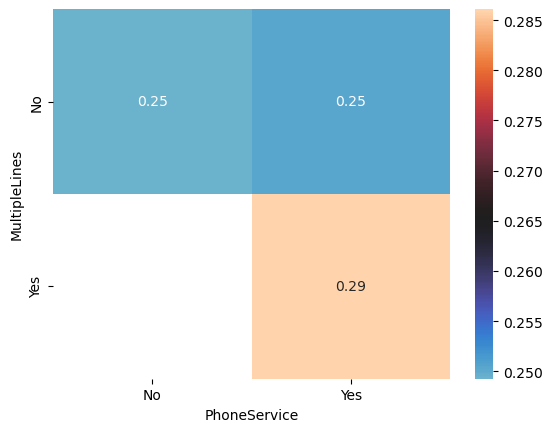

In [73]:
multiple_phone_churn = df.pivot_table(index='MultipleLines', columns='PhoneService', values='Churn_Flag', aggfunc='mean')
sns.heatmap(multiple_phone_churn ,annot=True,center=df['Churn_Flag'].mean())

<Axes: xlabel='TechSupport', ylabel='OnlineSecurity'>

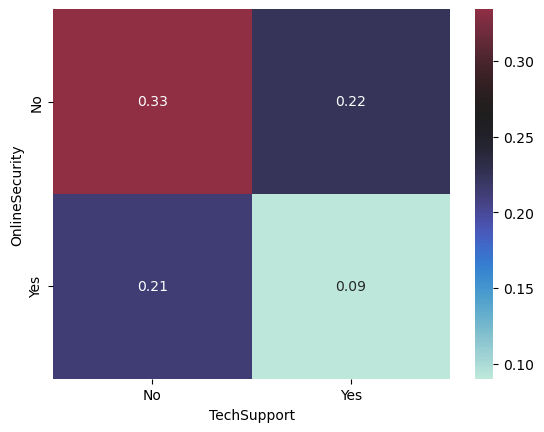

In [74]:
security_techsupport_churn = df.pivot_table(index='OnlineSecurity', columns='TechSupport', values='Churn_Flag', aggfunc='mean')
sns.heatmap(security_techsupport_churn ,annot=True,center=df['Churn_Flag'].mean())

<Axes: xlabel='StreamingMovies', ylabel='StreamingTV'>

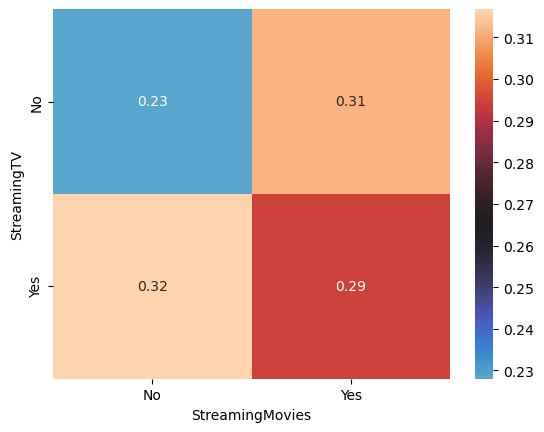

In [75]:
streaming_churn = df.pivot_table(index='StreamingTV', columns='StreamingMovies', values='Churn_Flag', aggfunc='mean')
sns.heatmap(streaming_churn,annot=True,center=df['Churn_Flag'].mean())

In [82]:
list_cat_var =df.select_dtypes(include=["object"]).columns
print(list_cat_var)

Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [83]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le =LabelEncoder()
for i in list_cat_var:
    df[i]=le.fit_transform(df[i])

In [87]:
df

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Flag
0,5375,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0,0
1,3962,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,0
2,2564,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1,1
3,5535,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,3,84.80,1990.50,0,0
7039,1525,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0,0
7040,3367,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,2,29.60,346.45,0,0
7041,5934,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1,1


In [88]:
y = df["Churn"]
X = df.drop("Churn",axis =1)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_pred = model.predict(x_test)

In [97]:
from sklearn.metrics import accuracy_score

In [126]:
acc=accuracy_score(y_test,y_pred)
rounded_acc = round(acc, 2)

In [127]:
print(acc*100)

100.0


In [100]:
# confusion matrix
cof_mat =sklearn.metrics.confusion_matrix(y_test,y_pred)
print(cof_mat)

[[1066    0]
 [   2  341]]


In [130]:
print("Logistic Regression Model Performance")

print("Accuracy:", acc)
p_score =precision_score(y_test,y_pred)
print("Precision:" ,p_score)
r_score = recall_score(y_test,y_pred)
print("Recall:" ,r_score)
f_score = f1_score(y_test,y_pred)
print("F1 Score: ",f_score)


Logistic Regression Model Performance
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score:  1.0


In [102]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)
print(fpr)
print(tpr)
print(threshold)

[0. 0. 1.]
[0.        0.9941691 1.       ]
[inf  1.  0.]


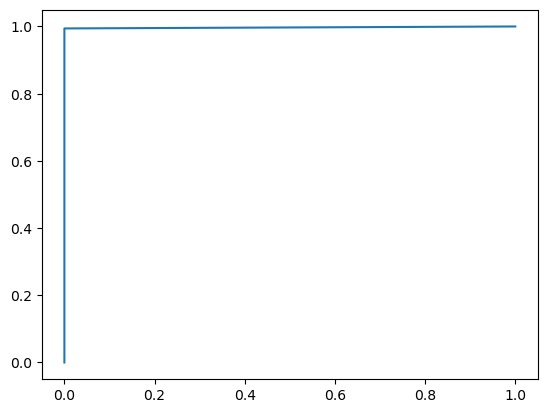

In [103]:
plt.plot(fpr,tpr)
plt.show()

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [106]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
y_pred = rf_classifier.predict(x_test)

In [110]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [111]:
print("Random Forest Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Random Forest Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [113]:
# Random Search Criteria
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [116]:
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

In [117]:
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)


In [119]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000176CAB89410>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000176CAC403D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000176CAC1CA50>},
                   random_state=42, scoring='accuracy')

In [120]:
# Get the best parameters
best_params_rand = random_search.best_params_
print("Best Parameters (Random Search):", best_params_rand)

Best Parameters (Random Search): {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 206}


In [121]:
# Get the best model
best_model_rand = random_search.best_estimator_

In [122]:
# Evaluation of the best model

y_pred_best_rand = best_model_rand.predict(x_test)
accuracy_best_rand = accuracy_score(y_test, y_pred_best_rand)
precision_best_rand = precision_score(y_test, y_pred_best_rand)
recall_best_rand = recall_score(y_test, y_pred_best_rand)
f1_best_rand = f1_score(y_test, y_pred_best_rand)

print("Best Random Forest Model Performance (Random Search):")
print("Accuracy:", accuracy_best_rand)
print("Precision:", precision_best_rand)
print("Recall:", recall_best_rand)
print("F1 Score:", f1_best_rand)

Best Random Forest Model Performance (Random Search):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
